<a href="https://colab.research.google.com/github/Vivek-afk81/NLP-101/blob/main/text_analytics_%26_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    from google.colab import drive
    drive.mount("/content/drive")
except ModuleNotFoundError:
    print(" Not running in Google Colab. Skipping drive mount.")


Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/nlp/data")

#Word Cloud Concepts

##Word Cloud

A **word cloud** is a visual representation of text data in which individual words are displayed with varying sizes. The size of each word typically reflects its frequency or importance within the given text. Words that appear more often are shown larger, while less frequent words appear smaller.

### Applications of Word Clouds

Word clouds are commonly used in:
- Text and sentiment analysis
- Survey and feedback analysis
- Educational data exploration
- Social media and marketing analysis
- Exploratory data analysis in data science projects

### How a Word Cloud Works

The process of creating a word cloud generally involves:
1. **Text collection** – Gathering text from sources such as documents, surveys, articles, or social media.
2. **Text preprocessing** – Removing punctuation, numbers, and common stop words (e.g., *and*, *the*, *is*).
3. **Frequency calculation** – Counting how often each word appears.
4. **Visualization** – Displaying the words visually, scaled according to their frequency or assigned weight.




In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

from collections import Counter

###Step 1:- Text Collection
####preparing data for the Wordcloud

In [5]:
from wordcloud import WordCloud,STOPWORDS

with open("Course-Descriptions.txt","r",encoding="utf-8") as f:
  file_data=f.read()

print("filedata sample",file_data[:200])

filedata sample In this practical, hands-on course, learn how to do data preparation, data munging, data visualization, and predictive analytics. 
PHP is the most popular server-side language used to build dynamic we


In [6]:
## Generate the wordcloud data
stopwords=set(STOPWORDS)
word_cloud=WordCloud(stopwords=stopwords,max_words=25, \
                     background_color="white").generate(file_data)

###Visualization
####displaying the WordCloud

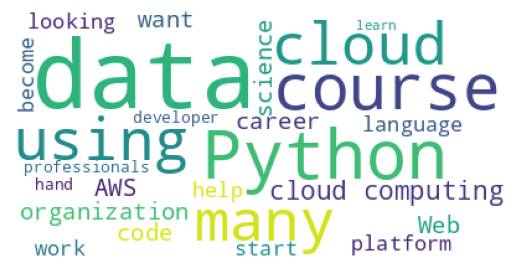

In [9]:
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

###Enhancing the WordCloud

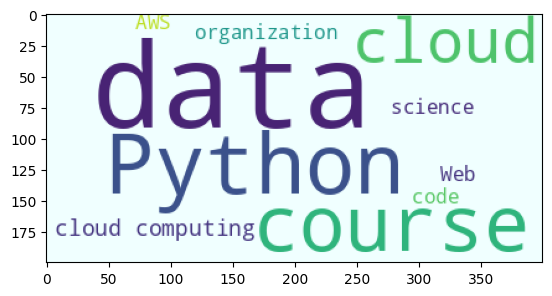

In [13]:
# Add more stopwords to ignore
stopwords.update(["many","using","want","value"])

#Redo stopwords limit number of words

word_cloud=WordCloud(stopwords=stopwords, max_words=10, \
                     background_color="azure").generate(file_data)

plt.imshow(word_cloud)

###Exploration

In [15]:
#Explore the word frequencies directly

words=file_data.lower().split()

word_freq=Counter(words)

word_freq.most_common(10)

[('to', 23),
 ('and', 21),
 ('the', 16),
 ('data', 12),
 ('of', 12),
 ('a', 11),
 ('you', 10),
 ('cloud', 9),
 ('in', 8),
 ('your', 8)]

### Limitations of Word Clouds

Word clouds rely primarily on word frequency and do not capture context, word relationships, or meaning. Important phrases may be split into individual words, and rare but meaningful terms may be overlooked.


## TF-IDF Based Word Cloud

A standard word cloud is based on raw word frequency, which means commonly occurring words tend to dominate the visualization. To address this limitation, a TF-IDF (Term Frequency–Inverse Document Frequency) approach can be used.

TF-IDF assigns higher importance to words that occur frequently in a document but less frequently across other documents. This helps highlight more distinctive and meaningful terms rather than generic ones.

Using TF-IDF in a word cloud allows the visualization to reflect word importance instead of simple frequency, making it more informative for text analysis.

In [19]:
#split text into smaller documents (lines)

documents=file_data.split("\n")

tf_idf=TfidfVectorizer(
    stop_words=list(stopwords),
    max_features=50
)


In [23]:
#Fit and transform the documents

tfidf_matrix= tf_idf.fit_transform(documents)

# Get feature names and their TF-IDF scores

features_names= tf_idf.get_feature_names_out()
tfidf_scores=tfidf_matrix.sum(axis=0).A1

In [25]:
# Convert to dictionary for WordCloud
tfidf_dict = dict(zip(features_names, tfidf_scores))

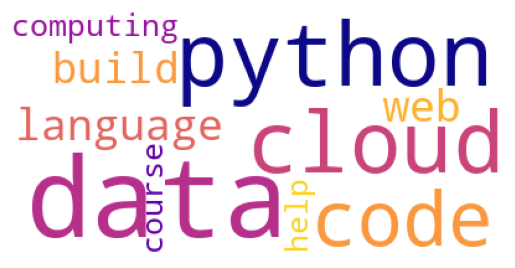

In [28]:
#Generate TF-IDF based word cloud

tfidf_wordcloud = WordCloud(
    background_color="white",
    max_words=10,
    colormap="plasma"

).generate_from_frequencies(tfidf_dict)

plt.imshow(tfidf_wordcloud)
plt.axis("off")
plt.show()

**Note** : Compared to the frequency-based word cloud, the TF-IDF-based word cloud emphasizes more specific and distinctive terms. Commonly repeated words that appeared large earlier may now appear smaller or disappear entirely.

###comparison


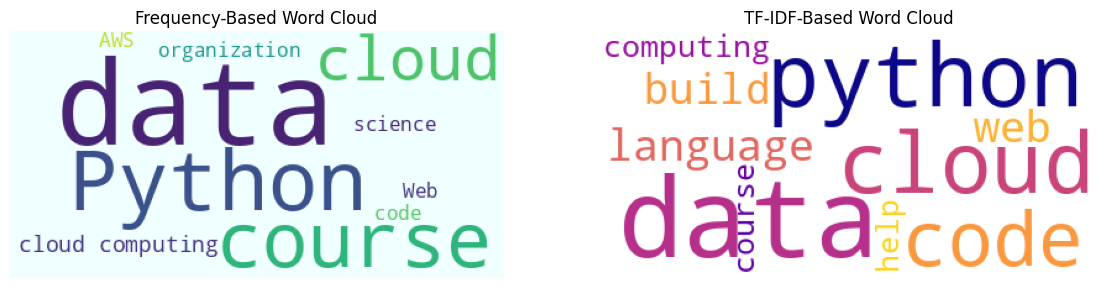

In [29]:
#Plotinf Side by Side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(word_cloud)
plt.title("Frequency-Based Word Cloud")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(tfidf_wordcloud)
plt.title("TF-IDF-Based Word Cloud")
plt.axis("off")

plt.show()
